In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import math
import scipy
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
# Grab and process the original data set
raw = pd.read_csv('fbi_data_2013.csv')
raw.columns = ['City','Population','Violent crime','Murder','Rape1','Rape2','Robbery','Aggravated Assault','Property Crime','Burglary','Larceny','MV Theft','Arson3']
raw.fillna(0, inplace=True)

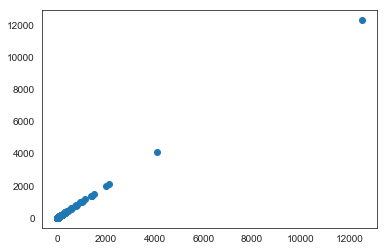

In [3]:
# Let's see if we can set up a model, excluding New York, using larceny and burglary to predict Property Crime
X = raw[['Burglary','Larceny']][raw['City']!= "New York"]
y = raw['Property Crime'][raw['City']!= "New York"]
# Let's put 30% of the data into the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression()
regr.fit(X_train,y_train)
predictions = regr.predict(X_test)
plt.scatter(y_test,predictions)


In [4]:
# let's add some holdouts and see how it holds up.
predictions = regr.fit(X, y).predict(X)

print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, y).score(X, y)))

With 20% Holdout: 0.9997464199278685
Testing on Sample: 0.9998051274431816


In [5]:
# let's add some folds and see how it holds up.
cross_val_score(regr, X, y, cv=10)

array([0.99971818, 0.99978263, 0.99811279, 0.99963657, 0.99795632,
       0.99791626, 0.99920129, 0.99995832, 0.9998678 , 0.99855729])

In [6]:
# Now let's give it a go against 2014 data
fbi2014 = pd.read_csv('fbi_data_2014.csv')
fbi2014.columns = ['City','Population','Violent crime','Murder','Rape1','Rape2','Robbery','Aggravated Assault','Property Crime','Burglary','Larceny','MV Theft','Arson3']
fbi2014.fillna(0, inplace=True)
fbi2014.describe()

,Population,Violent crime,Murder,Rape1,Rape2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,MV Theft,Arson3
count,3.690000e+02,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,3.778070e+04,183.680217,1.452575,9.569106,0.002710,60.658537,111.997290,696.439024,100.883469,561.238482,34.317073,1.409214
std,4.411616e+05,2638.843058,17.693912,114.869639,0.052058,866.481053,1640.515401,7114.024267,855.105355,5861.945422,406.956766,7.952852
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.620000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,4.000000,20.000000,0.000000,0.000000
50%,6.548000e+03,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000,75.000000,12.000000,60.000000,2.000000,0.000000
75%,1.540800e+04,18.000000,0.000000,2.000000,0.000000,4.000000,12.000000,270.000000,39.000000,228.000000,6.000000,1.000000
max,8.473938e+06,50564.000000,333.000000,2190.000000,1.000000,16581.000000,31460.000000,135747.000000,15916.000000,112107.000000,7724.000000,135.000000


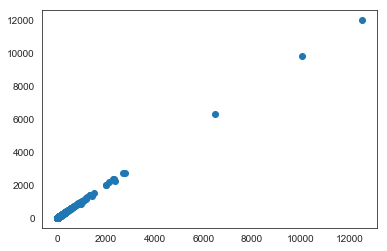

In [7]:
# Set test data to 2014 data
X_test = fbi2014[['Burglary','Larceny']][fbi2014['City']!= "New York"]
y_test = fbi2014['Property Crime'][fbi2014['City']!= "New York"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9)

regr = LinearRegression()
regr.fit(X_train,y_train)
predictions = regr.predict(X_test)
plt.scatter(y_test,predictions)


In [8]:
# let's add some holdouts and see how it holds up.
predictions = regr.fit(X, y).predict(X_test)

print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, y).score(X, y)))

With 20% Holdout: 0.9988874312465228
Testing on Sample: 0.9998051274431816


In [9]:
# let's add some folds and see how it holds up.
cross_val_score(regr, X_test, y_test, cv=30)

array([0.99858101, 0.99930527, 0.99979243, 0.999197  , 0.99740934,
       0.99953736, 0.99595035, 0.99929775, 0.99886152, 0.99748367,
       0.99988721, 0.99959651, 0.99956362, 0.999886  , 0.99823268,
       0.99986063, 0.99683362, 0.99828691, 0.99928037, 0.99973061,
       0.99964037, 0.99995544, 0.99963095, 0.99949031, 0.9995628 ,
       0.99977076, 0.99920842, 0.99953546, 0.99961577, 0.99965089])